# Visualization of audio signals


Signal shape: (445699,)
Signal Datatype: int16
Signal duration: 55.71 seconds


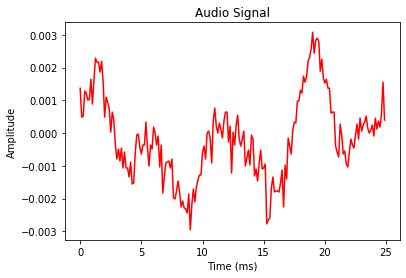

In [2]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

#Reading the stored audio file, returning sampling frequency and audio signal
freq_sampling, audio_sig = wavfile.read("C:/Users/Leekha/Desktop/audio_Harvard.wav")

#Displaying various parameters of the audio signal
print('\nSignal shape:', audio_sig.shape)
print('Signal Datatype:', audio_sig.dtype)
print('Signal duration:', round(audio_sig.shape[0] / float(freq_sampling), 2), 'seconds')

#Normalizing the audio signal
audio_sig = audio_sig / np.power(2, 15)

#To visualize the signal, extracting first 200 values from it
audio_sig = audio_sig [:200]
time_axis = 1000 * np.arange(0, len(audio_sig), 1) / float(freq_sampling)

#Now, let’s visualize the stored audio signal
plt.plot(time_axis, audio_sig, color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()


# Characterization of audio signal


Signal shape: (445699,)
Signal Datatype: int16
Signal duration: 55.71 seconds


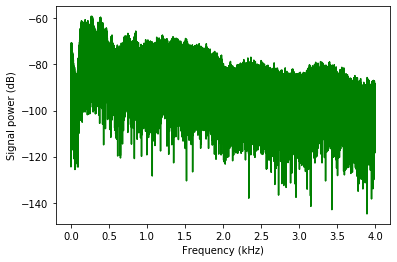

In [4]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

#Reading the stored audio file, returning sampling frequency and audio signal
freq_sampling, audio_sig = wavfile.read("C:/Users/Leekha/Desktop/audio_Harvard.wav")

#Displaying various parameters of the audio signal
print('\nSignal shape:', audio_sig.shape)
print('Signal Datatype:', audio_sig.dtype)
print('Signal duration:', round(audio_sig.shape[0] / float(freq_sampling), 2), 'seconds')

#Normalizing the audio signal
audio_sig = audio_sig / np.power(2, 15)

#Extracting length and half length of the signal
len_signal = len(audio_sig)
half_len = np.ceil((len_signal + 1) / 2.0).astype(np.int)

#Using Fourier Transform
signal_frequency = np.fft.fft(audio_sig)

#Normalizing frequency domain signal
signal_frequency = abs(signal_frequency[0:half_len]) / len_signal
signal_frequency **= 2

#Extracting length and half length of the frequency transformed signal
len_fts = len(signal_frequency)

#Adjusting Fourier transformed signal for both even and odd case:
if len_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2

#Extracting the power in dB and measuring frequency in kHz for x-axis
signal_power = 10 * np.log10(signal_frequency)
x_axis = np.arange(0, half_len, 1) * (freq_sampling / len_signal) / 1000.0

#Visualizing characterized signal
plt.figure()
plt.plot(x_axis, signal_power, color='green')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()


# Monotone audio signal generation

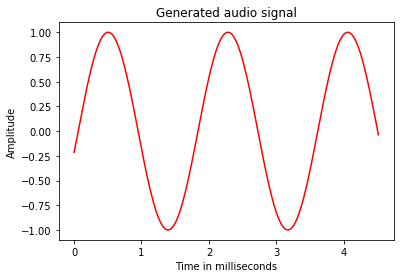

In [5]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

#File for saving the output audio signal
file_output = "C:/Users/Leekha/Desktop/audio_Harvard_monotone.wav"

#Specifying the parameters 
duration = 35  # in seconds
freq_sampling = 44100  # in Hz
freq_tone = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

#Generating the audio signal 
t = np.linspace(min_val, max_val, duration * freq_sampling)
audio_sig = np.sin(2 * np.pi * freq_tone * t)

#Saving the audio signal file in the output file 
write(file_output, freq_sampling, audio_sig)

#Extracting first 200 values for our graph 
audio_sig = audio_sig[:200]
time_axis = 1000 * np.arange(0, len(audio_sig), 1) / float(freq_sampling)

#Visualizing the generated audio signal
plt.plot(time_axis, audio_sig, color='red')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()


# Extraction of features from speech

In [6]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

#Reading the stored audio file, returning sampling frequency and audio signal
freq_sampling, audio_sig = wavfile.read("C:/Users/Leekha/Desktop/audio_Harvard.wav")

#Taking first 15000 samples for analysis
audio_sig = audio_sig[:15000]

#Exatracting MFCC features and printing its parameters 
mfcc_features = mfcc(audio_sig, freq_sampling)
print('\nMFCC:\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])



MFCC:
Number of windows = 186
Length of each feature = 13


Text(0.5, 1.05, 'MFCC')

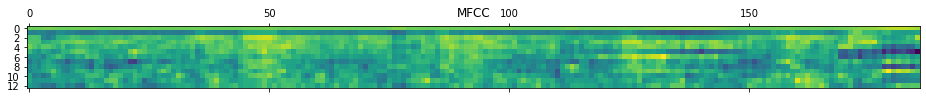

In [7]:
#Exatracting Filterbank features and printing its parameters 
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features)
plt.title('MFCC')



Filter bank:
Number of windows = 186
Length of each feature = 26


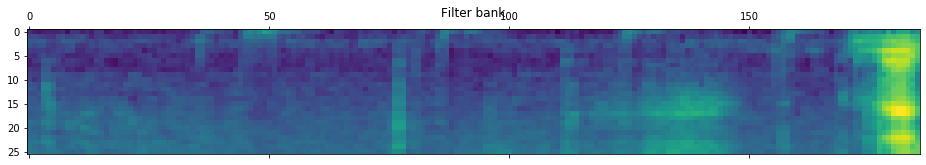

In [8]:
#Plotting and Visulaizing the Filterbank features 
filterbank_features = logfbank(audio_sig, freq_sampling)
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()


# Recognition of spoken words

In [9]:
#importing necessary packages
import speech_recognition as srec

#creating an object 
recording = srec.Recognizer()

#voice will be taken by Microphone() module as input
with srec.Microphone() as source:
    recording.adjust_for_ambient_noise(source)
    print("Say something:")
    audio = recording.listen(source)

#Google API will recognize the voice and provide output

try:
    print("What you said is: \n" + recording.recognize_google(audio))
except Exception as e:
    print(e)


Say something:
What you said is: 
speech recognition example
